In [ ]:
import numpy as np
import keras
import numpy as np
import seaborn as sns
import matplotlib .pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback,ModelCheckpoint,CSVLogger
import tensorflow as tf
import pickle
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train = datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BC_DataSet/train',target_size=(224,224),class_mode='binary',batch_size=64)
test = datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BC_DataSet/test',target_size=(224,224),class_mode='binary',batch_size=64)
val = datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BC_DataSet/val',target_size=(224,224),class_mode='binary',batch_size=64)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
imgs,labels = next(train)

In [ ]:
imgs.shape

(20, 224, 224, 3)

In [ ]:
train.class_indices

{'Benign': 0, 'Malignant': 1}

0.0


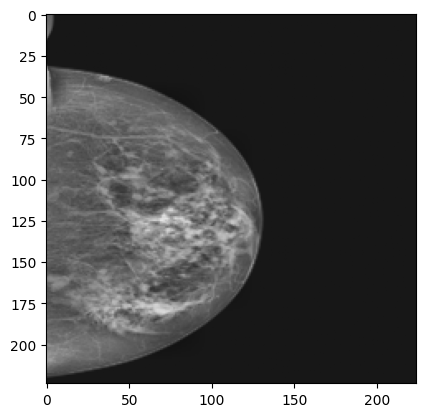

In [ ]:
plt.imshow(imgs[0])
print(labels[0])

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      25,233,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,234,433 (96.26 MB)

 Trainable params: 25,234,433 (96.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
STEP_SIZE_TRAIN = train.n//train.batch_size
STEP_SIZE_VAL = val.n // val.batch_size

In [ ]:
csv_logger = CSVLogger('/content/drive/MyDrive/training.log', separator=',', append=False)

In [ ]:
# Model training with the CSVLogger callback
history = model.fit(
    train,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=25,
    validation_data=test,
    validation_steps=STEP_SIZE_VAL,
    callbacks=[csv_logger]  # Adding the CSVLogger callback here
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.3500 - loss: 0.6996 - val_accuracy: 0.4500 - val_loss: 4.8577
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.7500 - loss: 3.6857 - val_accuracy: 0.5000 - val_loss: 2.4257
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.6500 - loss: 3.4460 - val_accuracy: 0.5000 - val_loss: 4.5647
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4500 - loss: 3.0768 - val_accuracy: 0.4500 - val_loss: 1.7320
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8500 - loss: 0.4000 - val_accuracy: 0.4000 - val_loss: 1.4493
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9500 - loss: 0.1927 - val_accuracy: 0.5000 - val_loss: 2.0393
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8000 - loss: 0.9354 - val_accuracy: 0.4000 - val_loss: 1.5866
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8500 - loss: 0.4952 - val_accuracy: 0.4000 - val_loss: 1.1090
Epoch 9/25
1/1 ━━━━━━━━

In [ ]:
# Save the entire model
model.save("/content/drive/MyDrive/Colab Notebooks/BC_DataSet/brain_tumor_classification_model.h5")
print("Model saved as brain_tumor_classification_model.h5")

Model saved as brain_tumor_classification_model.h5


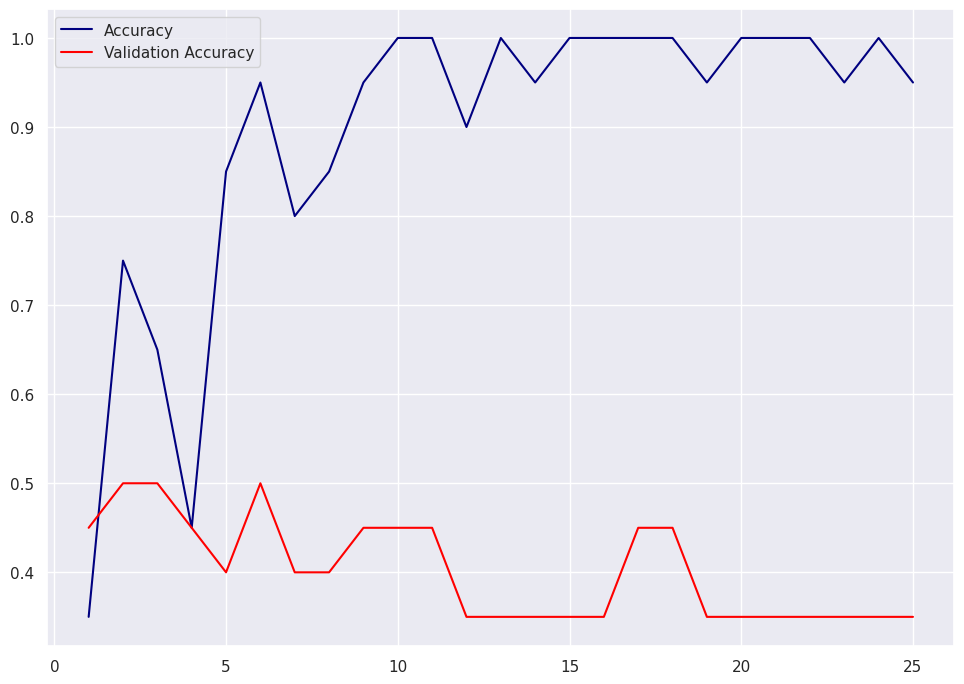

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.plot(np.arange(1,len(history.history['accuracy'])+1,1),
         history.history['accuracy'],
         color='navy',
         label='Accuracy')
plt.plot(np.arange(1,len(history.history['accuracy'])+1,1),
         history.history['val_accuracy'],
         color='red',
         label='Validation Accuracy')
plt.legend()

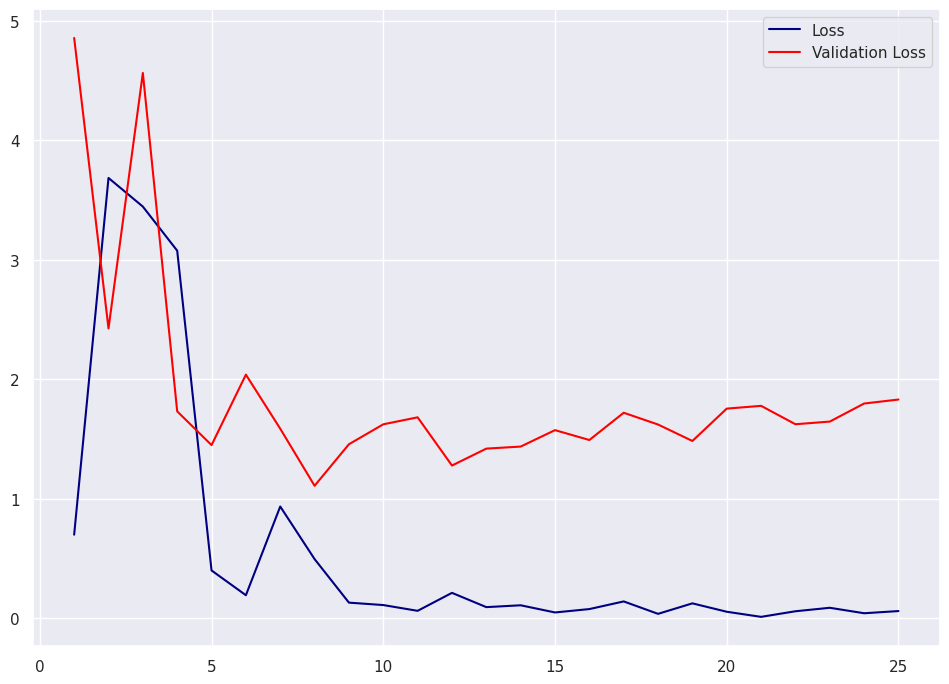

In [ ]:
plt.plot(np.arange(1,len(history.history['loss'])+1,1),
         history.history['loss'],
         color='navy',
         label='Loss')
plt.plot(np.arange(1,len(history.history['loss'])+1,1),
         history.history['val_loss'],
         color='red',
         label='Validation Loss')

plt.legend()